<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
           <p style="font-size:150%;text-align:center">Redes de decisión</p>
        </td>
    </tr>
</table>

---


# Objetivo  <a class="anchor" id="inicio"></a>

En este notebook veremos cómo tomar decisiones racionales, entendidas estas como aquellas que maximizan la utilidad esperada del agente. Veremos que podemos echar mano de las redes bayesianas, pero necesitamos también el concepto de las funciones de utilidad.

Adaptado de Russell & Norvig (2021), cap. 16.

# Secciones

* [Utilidad esperada y toma de decisiones.](#MEU)
* [Implementación de redes de decisión](#implementacion)
* [Escenarios más complejos.](#dependencia)
* [Agente basado en utilidad.](#utility-based)


# Utilidad esperada y toma de decisiones   <a class="anchor" id="MEU">



Hemos visto que uno de los objetivos de la Inteligencia Artificial es producir agentes cuyo comportamiento sea inteligente. Este se ha entendido tradicionalmente como la realización de acciones racionales, las cuales  buscan obtener fines de la manera más eficiente posible. Imagine que un agente debe tomar una decisión de entre un conjunto de acciones $\{a_1,\ldots, a_0\}$. Cada acción $a_i$ produce un estado $S_i$. Si el agente fuera indiferente frente a los estados $S_i$s, entonces cualquier acción estaría bien para él y el problema de decisión sería trivial. No obstante, un agente racional tiene un objetivo que quiere cumplir. Esto divide los estados $S_i$s en aquellos que cumplen el objetivo y aquellos que no. Es más, muchas veces es posible asignar una preferencia entre dos estados, $S_i$ y $S_j$, de tal manera que el agente prefiere a $S_i$ sobre $S_j$ si el primero lo acerca más a su objetivo que el segundo. Así pues, un agente racional, frente a su problema de decisión, realizará la acción $a$ que con mayor probabilidad lo lleve al estado que esté más cerca del objetivo.
    
Es posible formalizar esta idea usando tres conceptos. El primero es el de una *lotería*, el cual no es otra cosa que un conjunto de estados, cada uno con una probabilidad asignada: $\{S_1,p_1; S_2,p_2; \ldots; S_n,p_n\}$. El segundo es el de una *función de utilidad* $U$, la cual le asigna un valor numérico a cada estado $S_i$ de tal manera que $U(S_i)>U(S_j)$ sii el agente prefiere el estado $S_i$ sobre el estado $S_j$. Estos dos conceptos nos permiten definir la *Utilidad Esperada* de la siguiente manera:
    
$$U\!E=\sum_{i=1}^n U(S_i)p_i$$
    
El tercer concepto es que el conjunto de estados $\{S_1,p_1; S_2,p_2; \ldots; S_n,p_n\}$ depende de una acción $a$. Es decir, se representan situaciones en las cuales el resultado de una acción $a$ es incierta. La incertidumbre resulta porque la acción no determina completamente el resultado cuando, por ejemplo, este depende de otros agentes, o de factores que no son completamente conocidos y/o controlables por el agente. Esto es, una acción $a$ da como resultado un estado $S_1$ con probabilidad $P(S_1|a)$, o un estado $S_2$ con probabilidad $P(S_2|a)$, $\ldots$, o un estado $S_n$ con probabilidad $P(S_n|a)$. Así pues, tenemos el concepto de *Utilidad Esperada* de una acción $a$:
    
$$U\!E(a)=\sum_{i=1}^n U(S_i)P(S_i|a)\qquad\qquad (1)$$

Un agente racional, frente a un problema de decisión, decidirá ejecutar la acción que le permita **maximizar su utilidad esperada**:
    
$$\text{Acción}=\text{argmax}_a\, U\!E(a)=\text{argmax}_a\sum_{i=1}^n U(S_i)P(S_i|a)\qquad\qquad (2)$$

## Ejemplo con el mundo del Wumpus

Para ilustrar esta propuesta de cómo un agente toma una decisión racional, volvamos a nuestro bien conocido mundo del Wumpus. Suponga que el agente, después de partir de la celda $(0,0)$, se encuentra en la casilla $(1,0)$. Analicemos dos situaciones posibles, como lo muestran las siguientes figuras:

<table>
  <tr>
    <td><img src="./imagenes/ParaRedesDecisionB.png" width="300"></td>
    <td><img src="./imagenes/ParaRedesDecisionA.png" width="300"></td>
  </tr>
</table>

Las dos situaciones corresponden a si el agente siente una brisa (izquierda) o no (derecha). ¿Cuál es la acción racional en cada caso? Observe que el agente tiene tres acciones posibles:

1. Regresarse a $(0,0)$
2. Seguir a $(2,0)$
3. Subir a $(1,1)$.


Hagamos el ejercicio de asignar utilidades a los estados resultantes de estas acciones. Estos estados son, claramente, la casilla a la que llega el agente después de realizar la acción. Vamos a proceder a determinar la utilidad con base en la consideración de si en la casilla correspondiente hay o no un pozo y de si está o no el oro. Por ejemplo:

$$
U(\text{casilla}(x,y)) = \begin{cases}
1, & \text{si }oro(x,y) \wedge \neg pozo(x,y)\\
0, & \text{si }\neg oro(x,y) \wedge \neg pozo(x,y)\\
-1, & \text{ si }pozo(x,y)
\end{cases}
$$

Dado que el agente desconoce la localización de los pozos y del oro, no es posible deducir cuál es la utilidad de una casilla. No obstante, como vimos en el notebook pasado, sí podemos cuantificar la incertidumbre y revisar nuestras predicciones con base en la información que vamos incorporando. Podemos entonces ponderar la utilidad de cada estado posible con su probabilidad de ocurrencia, mediante la fórmula de la utilidad esperada (1). En este caso tendríamos:

\begin{align*}
U\!E(\text{ir a casilla }(x,y)|e)&=U(oro(x,y), \neg pozo(x,y))P(oro(x,y), \neg pozo(x,y)|e)\\
& \quad + U(\neg oro(x,y), \neg pozo(x,y))P(\neg oro(x,y), \neg pozo(x,y)|e)\\
& \quad + U(pozo(x,y))P(pozo(x,y)|e)\\
&=U(oro(x,y), \neg pozo(x,y))P(oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad + U(\neg oro(x,y), \neg pozo(x,y))P(\neg oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad + U(pozo(x,y))P(pozo(x,y)|e)\\
&= 1\times P(oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad + 0 \times P(\neg oro(x,y))P(\neg pozo(x,y)|e)\\
& \quad - 1 \times P(pozo(x,y)|e)
\end{align*}

La acción racional queda determinada por la fórmula (2) de maximización de la utilidad esperada, la cual requiere que realicemos el cálculo anterior para todas las acciones posibles, de tal manera que escogeremos la acción que tenga asociada la mayor utilidad esperada. 

Ahora bien, observe que llevar a cabo estos cálculos puede hacerse con o sin evidencia. Observe también que la evidencia disponible es lo que separa la situación de la figura de arriba a la izquierda (en donde la evidencia es que hay brisa en $(1,0)$) de la situación de la derecha (en donde no hay brisa). Podríamos tratar de hacer los cálculos a mano, pero es más divertido programar el computador para que los haga por nosotros.

Vamos a ver a continuación cómo usar el objeto `InfluenceDiagram` de la librería `pyagrum` para implementar el cálculo de la toma racional de decisiones. Comenzaremos con una situación en que no consideramos el oro, que es más sencilla, para luego incluir esta complicación en nuestros cálculos.

# Implementación de redes de decisión <a class="anchor" id="implementacion">
    
([Volver al inicio](#inicio))

Una red de decisión, también conocida como un diagrama de influencia, es una red que incorpora una red bayesiana, un nodo de acción y otro de utilidad (es posible tener más de un nodo de acción y más de un nodo de utilidad, pero en nuestros ejemplos solo tendremos uno de cada uno). Mediante ella es posible calcular las utilidades esperadas de las acciones de acuerdo a las probabilidades establecidas en la red bayesiana y la evidencia disponible.
    
En la red de decisión hay tres tipos de nodos:
    
* Nodos de probabilidad: son los nodos de la red bayesiana.
* Nodo de decisión: es el nodo que representa las acciones posibles.
* Nodo de utilidad: está conectado a los demás nodos de tal manera que representa la utilidad esperada de cada acción del nodo de decisión, de acuerdo a las probabilidades de los nodos de probabilidad.
 
Para comprender mejor estos conceptos, creemos una red de decisión simple para el ejemplo del mundo del Wumpus que discutimos anteriormente. 

### Ejemplo sin considerar el oro <a class="anchor" id="sin_oro">
    
([Siguiente ejemplo](#solo_oro))



Vamos a comenzar con un caso sencillo, en el cual no tomamos en cuenta si hay o no oro en una casilla. De esta manera, nuestra función de utilidad es la siguiente:
    
$$
U(\text{casilla}(x,y)) = \begin{cases}
1, & \text{si }\neg pozo(x,y)\\
-1, & \text{ si }pozo(x,y)
\end{cases}
$$
    
Lo primero que debemos hacer es cargar las librerías que necesitamos:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from entornos import *
from agentes import *
from busqueda import *
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gum.config['notebook','potential_visible_digits']=2
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

A continuación, creamos una instancia de la clase `InfluenceDiagram`:

In [2]:
model = gum.InfluenceDiagram()

Ahora creamos los nodos de probabilidad y sus conexiones. Observe que esto es muy similar a la manera como creamos una red bayesiana en el notebook pasado:

**Red bayesiana con los nodos de probabilidad:**

In [3]:
# Creando los nodos
pozo0 = gum.LabelizedVariable('pozo(0,0)','pozo(0,0)',2)
model.addChanceNode(pozo0)
pozo1 = gum.LabelizedVariable('pozo(1,1)','pozo(1,1)',2)
model.addChanceNode(pozo1)
pozo2 = gum.LabelizedVariable('pozo(2,0)','pozo(2,0)',2)
model.addChanceNode(pozo2)
brisa = gum.LabelizedVariable('brisa(1,0)','brisa(1,0)',2)
model.addChanceNode(brisa)

# Creando las aristas de la red bayesiana
model.addArc('pozo(0,0)', 'brisa(1,0)')
model.addArc('pozo(1,1)', 'brisa(1,0)')
model.addArc('pozo(2,0)', 'brisa(1,0)')

# Creando las probabilidades
model.cpt('pozo(0,0)')[:]=[0.8,0.2]
model.cpt('pozo(1,1)')[:]=[0.8,0.2]
model.cpt('pozo(2,0)')[:]=[0.8,0.2]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 1, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 1, 'pozo(2,0)': 0}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 0, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 0, 'pozo(2,0)': 0}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 0}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 0}] = [1, 0]

model

(pyAgrum.InfluenceDiagram<double>@000001323774D530) Influence Diagram{
  chance: 4,
  utility: 0,
  decision: 0,
  arcs: 3,
  domainSize: 16
}

**Nodo de decisión:**

Luego creamos un nodo de decisión. Este nodo es la variable que representa cuál es la acción a tomar. En nuestro ejemplo, definir una acción es equivalente a considerar a cuál casilla se va a mover el agente.

In [4]:
casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',3)
casilla.changeLabel(0,'(0,0)')
casilla.changeLabel(1,'(2,0)')
casilla.changeLabel(2,'(1,1)')
model.addDecisionNode(casilla)

model

(pyAgrum.InfluenceDiagram<double>@000001323774D530) Influence Diagram{
  chance: 4,
  utility: 0,
  decision: 1,
  arcs: 3,
  domainSize: 48
}

**Nodo de utilidad:**

Y ahora creamos el nodo de utilidad. Las conexiones a este nodo deben ser todas las variables sobre las cuales depende la utilidad del estado obtenido por la acción realizada. En nuestro caso, consideramos los pozos y la casilla a la que se mueve el agente:

In [5]:
ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
model.addUtilityNode(ut_casilla)

model.addArc('pozo(0,0)', 'UtilityOfCasilla')
model.addArc('pozo(1,1)', 'UtilityOfCasilla')
model.addArc('pozo(2,0)', 'UtilityOfCasilla')
model.addArc('Casilla', 'UtilityOfCasilla')

model

(pyAgrum.InfluenceDiagram<double>@000001323774D530) Influence Diagram{
  chance: 4,
  utility: 1,
  decision: 1,
  arcs: 7,
  domainSize: 48
}

Nos falta incluir el cálculo de la utilidad de cada acción (que en nuestro caso es una casilla). Definamos primero la función de utilidad de una casilla:

In [6]:
def utilidad(d):
    '''
    Función que determina la utilidad de una casilla.
    Input: d, que es un diccionario de la forma:
        {
            'pozo(0,0)':valor1,
            'pozo(1,1)':valor2,
            'pozo(2,0)':valor3,
            'Casilla':'(x,y)'
        }
    '''
    
    C = d['Casilla']
    if (d['pozo' + C] == 0):
        return 1
    else:
        return -1

Comprobamos el funcionamiento de la función con un ejemplo:

In [7]:
# ejemplo 1
d = {'pozo(0,0)':1,'pozo(1,1)':0,'pozo(2,0)':1,'Casilla':'(0,0)'}
utilidad(d)

-1

In [8]:
# ejemplo 2
d = {'pozo(0,0)':1,'pozo(1,1)':0,'pozo(2,0)':1,'Casilla':'(1,1)'}
utilidad(d)

1

Ahora debemos asignar la utilidad al nodo `UtilityOfCasilla` de acuerdo a todas las posibles combinaciones de valores para las variables que conectan a ella. Pero para hacer esto de manera escalable, crearemos automáticamente todos los diccionarios con todas las combinaciones de valores posibles.

In [9]:
variables = ['pozo(0,0)','pozo(1,1)','pozo(2,0)','Casilla']
opciones = product([0,1], [0,1], [0,1], ['(0,0)','(1,1)','(2,0)'])
dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
dicts_variables

[{'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 0, 'Casilla': '(0,0)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 0, 'Casilla': '(1,1)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 0, 'Casilla': '(2,0)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 1, 'Casilla': '(0,0)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 1, 'Casilla': '(1,1)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 1, 'Casilla': '(2,0)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 0, 'Casilla': '(0,0)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 0, 'Casilla': '(1,1)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 0, 'Casilla': '(2,0)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 1, 'Casilla': '(0,0)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 1, 'Casilla': '(1,1)'},
 {'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 1, 'Casilla': '(2,0)'},
 {'pozo(0,0)': 1, 'pozo(1,1)': 0, 'pozo(2,0)': 0, 'Casilla': '(0,0)'},
 {'pozo(0,0)': 1, 'pozo(1,1)': 0, 'pozo(2,0)': 0, 'Casilla': '(1,1)'},
 {'poz

Asignamos la utilidad del nodo `UtilityOfCasilla`:

In [10]:
for d in dicts_variables:
    model.utility('UtilityOfCasilla')[d]=utilidad(d)

Y finalmente comprobamos que el cálculo de la utilidad sea el esperado:

In [11]:
ie = gum.InfluenceDiagramInference(model)
ie.makeInference()
ie.posteriorUtility("UtilityOfCasilla")

(pyAgrum.Potential<double>@0000013238F5C878) 
                           ||  Utility|
pozo(0|pozo(1|pozo(2|Casill||0        |
------|------|------|------||---------|
0     |0     |0     |(0,0) || 1.0000  |
1     |0     |0     |(0,0) || -1.0000 |
0     |1     |0     |(0,0) || 1.0000  |
1     |1     |0     |(0,0) || -1.0000 |
0     |0     |1     |(0,0) || 1.0000  |
1     |0     |1     |(0,0) || -1.0000 |
[...12 more line(s) ...]
0     |1     |0     |(1,1) || -1.0000 |
1     |1     |0     |(1,1) || -1.0000 |
0     |0     |1     |(1,1) || 1.0000  |
1     |0     |1     |(1,1) || 1.0000  |
0     |1     |1     |(1,1) || -1.0000 |
1     |1     |1     |(1,1) || -1.0000 |

Ya podemos visualizar la red de decisión:

Situación I: Análisis del escenario sin información:


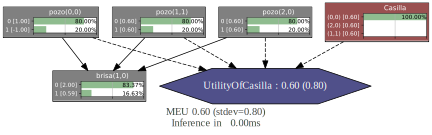

In [12]:
print("Situación I: Análisis del escenario sin información:")
gnb.showInference(model,evs={},size="6")

Observe que el nodo de decisión `Casilla` nos muestra la utilidad esperada de cada opción. En este caso, todas tienen un valor de 0.6. La mejor opción también está señalada (que en este caso es la primera que aparece).

Ahora bien, debemos incluir la evidencia que tengamos a nuestra disposición. Ya sabemos que no hay pozo en la casilla $(0,0)$ porque las reglas del mundo lo prohiben. También, dependiendo del escenario que consideremos (izquierda -- con brisa -- o derecha -- sin brisa -- ), podemos ver qué acción tiene mayor utilidad esperada. Tómese unos minutos para entender el análisis siguiente de las dos situaciones visualizadas en la red de decisión:

Situación II: Análisis del escenario con brisa:


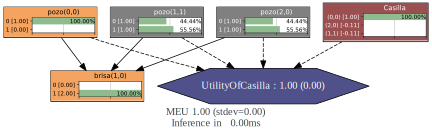

Situación III: Análisis del escenario sin brisa:


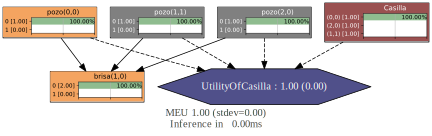

In [13]:
print("Situación II: Análisis del escenario con brisa:")
gnb.showInference(model,evs={'pozo(0,0)':0,'brisa(1,0)':1},size="6")
print("Situación III: Análisis del escenario sin brisa:")
gnb.showInference(model,evs={'pozo(0,0)':0,'brisa(1,0)':0},size="6")

Tanto en la situación I como en la III, tenemos varias acciones con la misma utilidad esperada: un empate entre máximos. El método `optimalDecision` que viene con la librería siempre escogerá la primera acción en este empate:

In [14]:
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence({'pozo(0,0)':0,'brisa(1,0)':0})
ie.makeInference()
print("Utilidades esperadas de las acciones:")
print(ie.posteriorUtility("Casilla"))
print("Decisión de la librería:")
print(ie.optimalDecision("Casilla"))

Utilidades esperadas de las acciones:

  Casilla                    |
(0,0)    |(2,0)    |(1,1)    |
---------|---------|---------|
 1.0000  | 1.0000  | 1.0000  |

Decisión de la librería:

  Casilla                    |
(0,0)    |(2,0)    |(1,1)    |
---------|---------|---------|
 1.0000  | 0.0000  | 0.0000  |



Podemos crear una sencilla función auxiliar para escoger una acción aleatoria entre aquellas que tienen máxima utilidad esperada:

In [15]:
def maximo_aleatorio(valores):
    indices = [i for i, x in enumerate(valores) if x == max(valores)]
    return np.random.choice(indices)

In [16]:
casillas = ['(0,0)', '(1,1)', '(2,0)']
valores = ie.posteriorUtility("Casilla").tolist()
accion = maximo_aleatorio(valores)
print("Primera iteración:", casillas[accion])
accion = maximo_aleatorio(valores)
print("Segunda iteración:", casillas[accion])
accion = maximo_aleatorio(valores)
print("Tercera iteración:", casillas[accion])

Primera iteración: (0,0)
Segunda iteración: (1,1)
Tercera iteración: (2,0)


**Ejercicio 1:**

Haga un análisis de las utilidades esperadas y de la acción racional a tomar cuando el agente sabe que no hay pozo en $(0,0)$ pero sí en $(2,0)$.

Análisis del escenario sin pozo en (0,0) y con pozo en (2,0):


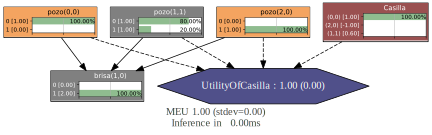

In [17]:
print("Análisis del escenario sin pozo en (0,0) y con pozo en (2,0):")
gnb.showInference(model,evs={'pozo(0,0)':0,'pozo(2,0)':1},size="6")

La mayor utilidad esperada se encuentra en la casilla `(0,0)`. 

---

### Ejemplo solo incluyendo el oro <a class="anchor" id="solo_oro">
    
([Anterior ejemplo](#sin_oro)  -- [Siguiente ejemplo](#combinado))

Antes de incluir tanto pozos como oro en una red de decisión, consideremos primero un ejemplo en donde sólo incluimos el oro. Junto con el ejemplo anterior, ya sabremos cómo influyen estos dos factores en la utilidad y nos será más claro analizar el caso combinado.
    
Comenzamos creando la parte correspondiente a la red bayesiana, que en este caso relaciona una variable `oro`, que representa la localización del oro en la rejilla, con las variables binarias que representan si en una casilla hay o no brillo:

In [18]:
model = gum.InfluenceDiagram()

# Creamos los nodos de probabilidad
oro0 = gum.LabelizedVariable('brillo(0,0)','brillo(0,0)',2)
model.addChanceNode(oro0)
oro1 = gum.LabelizedVariable('brillo(1,1)','brillo(1,1)',2)
model.addChanceNode(oro1)
oro2 = gum.LabelizedVariable('brillo(2,0)','brillo(2,0)',2)
model.addChanceNode(oro2)
oro = gum.LabelizedVariable('oro','oro',3)
oro.changeLabel(0,'(0,0)')
oro.changeLabel(1,'(1,1)')
oro.changeLabel(2,'(2,0)')
model.addChanceNode(oro)

# Creamos las aristas de la red bayesiana
model.addArc('oro', 'brillo(0,0)')
model.addArc('oro', 'brillo(1,1)')
model.addArc('oro', 'brillo(2,0)')

# Creamos las probabilidades
model.cpt('oro').fillWith([1/3,1/3,1/3])
model.cpt('brillo(0,0)')[{'oro': 0}] = [0,1]
model.cpt('brillo(0,0)')[{'oro': 1}] = [1,0]
model.cpt('brillo(0,0)')[{'oro': 2}] = [1,0]
model.cpt('brillo(1,1)')[{'oro': 0}] = [1,0]
model.cpt('brillo(1,1)')[{'oro': 1}] = [0,1]
model.cpt('brillo(1,1)')[{'oro': 2}] = [1,0]
model.cpt('brillo(2,0)')[{'oro': 0}] = [1,0]
model.cpt('brillo(2,0)')[{'oro': 1}] = [1,0]
model.cpt('brillo(2,0)')[{'oro': 2}] = [0,1]

model

(pyAgrum.InfluenceDiagram<double>@000001323774DBC0) Influence Diagram{
  chance: 4,
  utility: 0,
  decision: 0,
  arcs: 3,
  domainSize: 24
}

Incluimos ahora el nodo de decisión, el de utilidad, y las relaciones de utilidades. La utilidad, cuando sólo consideramos el oro, estará dada por la siguiente fórmula:

$$
U(\text{casilla}(x,y)) = \begin{cases}
1, & \text{si }Oro(x,y)\\
0, & \text{ si }\neg Oro(x,y)
\end{cases}
$$

In [19]:
# Creamos el nodo de decisión
casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',3)
casilla.changeLabel(0,'(0,0)')
casilla.changeLabel(1,'(2,0)')
casilla.changeLabel(2,'(1,1)')
model.addDecisionNode(casilla)

# Creamos el nodo de utilidad
ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
model.addUtilityNode(ut_casilla)

# Creamos las aristas de la utilidad
model.addArc('oro', 'UtilityOfCasilla')
model.addArc('Casilla', 'UtilityOfCasilla')

# Asignamos las utilidades
variables = ['oro','Casilla']
opciones = product(['(0,0)','(1,1)','(2,0)'], ['(0,0)','(1,1)','(2,0)'])
dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]

def utilidad(d):
    C = d['Casilla']
    if d['oro'] == C:
        return 1
    else:
        return 0

for d in dicts_variables:
    model.utility('UtilityOfCasilla')[d]=utilidad(d)


model

(pyAgrum.InfluenceDiagram<double>@000001323774DBC0) Influence Diagram{
  chance: 4,
  utility: 1,
  decision: 1,
  arcs: 5,
  domainSize: 72
}

Confirmamos que el cálculo de la utilidad esté correcto:

In [20]:
ie = gum.InfluenceDiagramInference(model)
ie.makeInference()
ie.posteriorUtility("UtilityOfCasilla")

(pyAgrum.Potential<double>@000001323946C458) 
             ||  Utility|
oro   |Casill||0        |
------|------||---------|
(0,0) |(0,0) || 1.0000  |
(1,1) |(0,0) || 0.0000  |
(2,0) |(0,0) || 0.0000  |
(0,0) |(2,0) || 0.0000  |
(1,1) |(2,0) || 0.0000  |
(2,0) |(2,0) || 1.0000  |
(0,0) |(1,1) || 0.0000  |
(1,1) |(1,1) || 1.0000  |
(2,0) |(1,1) || 0.0000  |

Consideremos ahora el escenario sin evidencia:

Situación I: Análisis del escenario sin evidencia:


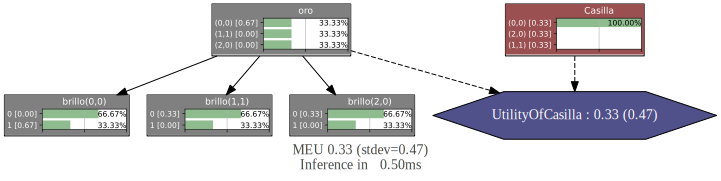

In [21]:
print("Situación I: Análisis del escenario sin evidencia:")
gnb.showInference(model,evs={},size="30")

En la situación I, en la cual no tenemos evidencia, cualquiera de las tres casillas representa la misma utilidad esperada. Esto coincide con nuestra intuición, toda vez que el oro puede estar en cualquiera de ellas. 

**Ejercicio 2:**

Analice el escenario en el que no hay brillo en $(0,0)$. ¿Qué casilla tiene mayor utilidad esperada? ¿Es esto intuitivamente cierto?

Análisis del escenario sin brillo en (0,0):


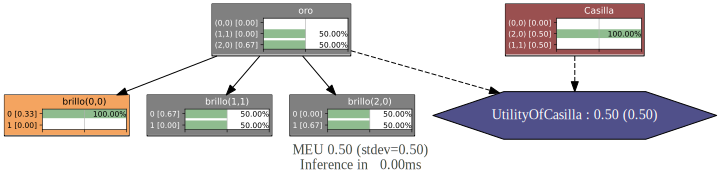

In [22]:
print("Análisis del escenario sin brillo en (0,0):")
gnb.showInference(model,evs={'brillo(0,0)':0},size="30")

Al no haber brillo en `(0,0)` no es buena opción ir a esta casiilla. Las dos casillas restantes muestran el mismo valor de utilidad, y la libreria escoge el primero. Esto comportamiento es intuitivamente correcto: No es necesario retornar a la casilla `(0,0)` pues allí no está el oro; al contrario, continua la exploración a otras casillas. 

---

# Escenarios más complejos  <a class="anchor" id="dependencia">
    
([Volver al inicio](#inicio))
    
Ya estamos listos para considerar un escenario que incluye tanto los pozos y la briza como el oro y el brillo. Pero haremos esto en dos pasos: primero ambas variables en un escenario pequeño, luego el escenario completo que se requiere para implementar un agente basado en utilidad. 

    
### Oro y pozos <a class="anchor" id="combinado">
    
El siguiente es el código que genera la red de decisión. Observe la creación de la red bayesiana, del nodo de decisión con las acciones del agente, y el nodo de utilidad con la utilidad que definimos al comienzo del notebook.
    
([Anterior ejemplo](#solo_oro)  -- [Siguiente ejemplo](#combinado_todos))


Situación I: Análisis del escenario sin evidencia:


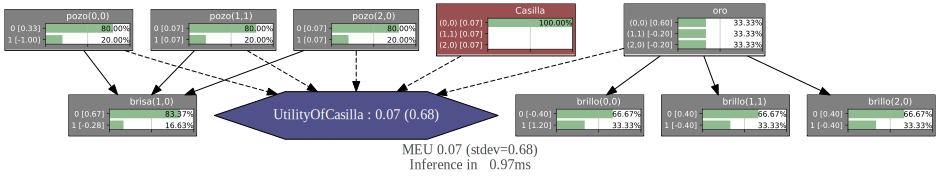

In [23]:
model = gum.InfluenceDiagram()

# Creamos los nodos de probabilidad
pozo0 = gum.LabelizedVariable('pozo(0,0)','pozo(0,0)',2)
model.addChanceNode(pozo0)
pozo1 = gum.LabelizedVariable('pozo(1,1)','pozo(1,1)',2)
model.addChanceNode(pozo1)
pozo2 = gum.LabelizedVariable('pozo(2,0)','pozo(2,0)',2)
model.addChanceNode(pozo2)
brisa = gum.LabelizedVariable('brisa(1,0)','brisa(1,0)',2)
model.addChanceNode(brisa)
oro0 = gum.LabelizedVariable('brillo(0,0)','brillo(0,0)',2)
model.addChanceNode(oro0)
oro1 = gum.LabelizedVariable('brillo(1,1)','brillo(1,1)',2)
model.addChanceNode(oro1)
oro2 = gum.LabelizedVariable('brillo(2,0)','brillo(2,0)',2)
model.addChanceNode(oro2)
oro = gum.LabelizedVariable('oro','oro',3)
oro.changeLabel(0,'(0,0)')
oro.changeLabel(1,'(1,1)')
oro.changeLabel(2,'(2,0)')
model.addChanceNode(oro)

# Creamos las aristas de la red bayesiana
model.addArc('pozo(0,0)', 'brisa(1,0)')
model.addArc('pozo(1,1)', 'brisa(1,0)')
model.addArc('pozo(2,0)', 'brisa(1,0)')
model.addArc('oro', 'brillo(0,0)')
model.addArc('oro', 'brillo(1,1)')
model.addArc('oro', 'brillo(2,0)')

# Creamos las probabilidades
model.cpt('pozo(0,0)')[:]=[0.8,0.2]
model.cpt('pozo(1,1)')[:]=[0.8,0.2]
model.cpt('pozo(2,0)')[:]=[0.8,0.2]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 1, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 1, 'pozo(2,0)': 0}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 0, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 1, 'pozo(1,1)': 0, 'pozo(2,0)': 0}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 1, 'pozo(2,0)': 0}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 1}] = [0, 1]
model.cpt('brisa(1,0)')[{'pozo(0,0)': 0, 'pozo(1,1)': 0, 'pozo(2,0)': 0}] = [1, 0]
model.cpt('oro').fillWith([1/3,1/3,1/3])
model.cpt('brillo(0,0)')[{'oro': 0}] = [0,1]
model.cpt('brillo(0,0)')[{'oro': 1}] = [1,0]
model.cpt('brillo(0,0)')[{'oro': 2}] = [1,0]
model.cpt('brillo(1,1)')[{'oro': 0}] = [1,0]
model.cpt('brillo(1,1)')[{'oro': 1}] = [0,1]
model.cpt('brillo(1,1)')[{'oro': 2}] = [1,0]
model.cpt('brillo(2,0)')[{'oro': 0}] = [1,0]
model.cpt('brillo(2,0)')[{'oro': 1}] = [1,0]
model.cpt('brillo(2,0)')[{'oro': 2}] = [0,1]

# Creamos el nodo de decisión
casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',3)
casilla.changeLabel(0,'(0,0)')
casilla.changeLabel(1,'(1,1)')
casilla.changeLabel(2,'(2,0)')
model.addDecisionNode(casilla)

# Creamos el nodo de utilidad
ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
model.addUtilityNode(ut_casilla)

# Creamos las aristas de utilidad
model.addArc('pozo(0,0)', 'UtilityOfCasilla')
model.addArc('pozo(1,1)', 'UtilityOfCasilla')
model.addArc('pozo(2,0)', 'UtilityOfCasilla')
model.addArc('oro', 'UtilityOfCasilla')
model.addArc('Casilla', 'UtilityOfCasilla')

# Asignamos las utilidades
variables = ['pozo(0,0)','pozo(1,1)','pozo(2,0)','oro','Casilla']
opciones = product([0,1], [0,1], [0,1], ['(0,0)','(1,1)','(2,0)'], ['(0,0)','(1,1)','(2,0)'])
dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]

def utilidad(d):
    C = d['Casilla']
    if (d['pozo'+C] == 0) and (d['oro'] == C):
        return 1
    elif (d['pozo'+C] == 0):
        return 0
    else:
        return -1

for d in dicts_variables:
    model.utility('UtilityOfCasilla')[d]=utilidad(d)

print("Situación I: Análisis del escenario sin evidencia:")
gnb.showInference(model,evs={},size="30")

Observe que cuando el agente está en la casilla $(1,0)$ y no tiene ninguna información sobre el mundo, todas las tres acciones posibles tienen la misma utilidad. Esto cambia cuando incluimos evidencia. Realice los siguientes ejercicios para analizar distintos esceneraios.

**Ejercicio 3:**

Considere un escenario en el cual no hay brillo en $(0,0)$ ni brisa en $(1,0)$. Este es el escenario de la figura de la derecha al comienzo del notebook. En este escenario, ¿cuál acción tiene mayor utilidad esperada? ¿Es esto intuitivamente cierto?

Análisis del escenario sin brillo en (0,0) y sin brisa en (0,0):


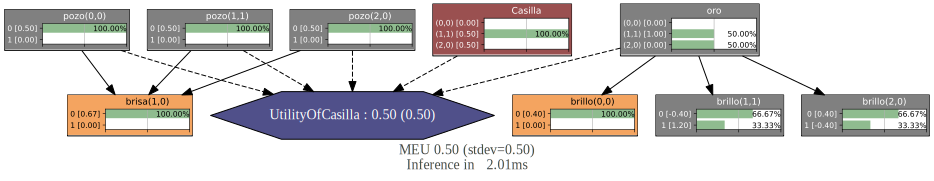

In [24]:
print("Análisis del escenario sin brillo en (0,0) y sin brisa en (0,0):")
gnb.showInference(model,evs={'brillo(0,0)':0,'brisa(1,0)':0},size="20")

Como no hay brisa en `(1,0)`, es evidente que no hay pozo en las casillas adyacentes al agente. Además, como tampoco hay brillo, tampoco genera utilidad regresar a la casilla inicial. Por tanto, la mejor opción es avanzar y al no tener más evidencia del mundo, se puede avanzar con la misma incertidumbre tanto a `(1,1)` como a `(2,0)`. Por tanto, el comportamiento de la red es correcto. 

---

**Ejercicio 4:**

Considere un escenario en el cual no hay brillo ni pozo en $(0,0)$, pero hay brisa en $(1,0)$. En este escenario, ¿cuál acción tiene mayor utilidad esperada? ¿Es esto intuitivamente cierto?

Análisis del escenario sin brillo ni pozo en (0,0) y con brisa en (0,0):


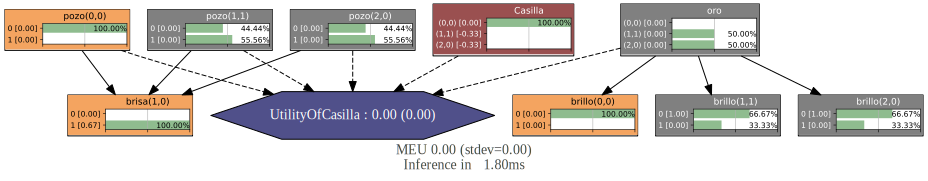

In [25]:
print("Análisis del escenario sin brillo ni pozo en (0,0) y con brisa en (0,0):")
gnb.showInference(model,evs={'pozo(0,0)':0, 'brillo(0,0)':0, 'brisa(1,0)':1},size="20")

El comportamiento de la red es adecuado, puesto que dado que hay brisa en `(1,0)`, es porbable que haya pozo en `(1,1)` y desplazarse a esta casilla es altamente riesgoso para el agente.

---

### El escenario con brisa y oro completos <a class="anchor" id="combinado_todos">
    
([Anterior ejemplo](#combinado))

Resulta muy ineficiente crear el escenario con todas las variables para brisa, pozo, brillo y oro de todas las rejillas. En efecto, para implementar la función de utilidad requeriríamos una cantidad astronómica de diccionarios (el número exacto es $2^{16}*2^{16}*16*16\approx 7\times 10^{16}$). La solución, la cual resulta bastante buena, como veremos a continuación, es crear una red de decisión para cada casilla. Aún así, necesitamos crear una variable para todos los brillos, pero no para todas las brisas y pozos. Para estas últimas sólo necesitamos considerar casillas adyacentes de manera limitada.

El siguiente es el código para crear la red de decisión para una casilla dada. Tómese unos minutos para analizarlo, así sea por encima.

In [26]:
W = Wumpus()
def adyacentes(c):
    return W.adyacentes(c)

def crear_red_decision(cas):   
    
    model = gum.InfluenceDiagram()
    
    todas_casillas = [(x,y) for x in range(4) for y in range(4)]
    total_casillas = len(todas_casillas)
    casillas = adyacentes(cas)
    num_casillas = len(casillas)
    aux = [adyacentes(c) for c in casillas]
    aux = [item for sublist in aux for item in sublist]
    casillas_adyacentes2 = list(set(aux))
    aux = [adyacentes(c) for c in casillas_adyacentes2]
    aux = [item for sublist in aux for item in sublist]
    casillas_adyacentes3 = list(set(aux))

    # Creando variables del oro y brillo
    oro = gum.LabelizedVariable('oro','oro',total_casillas)
    for i, c in enumerate(todas_casillas):
        oro.changeLabel(i,str(c))
        brillo_i = gum.LabelizedVariable('brillo'+str(c),'brillo'+str(c),2)
        model.addChanceNode(brillo_i)
    model.addChanceNode(oro)

    # Creando variables de pozo
    for c in casillas_adyacentes3:
        pozo_i = gum.LabelizedVariable('pozo'+str(c),'pozo'+str(c),2)
        model.addChanceNode(pozo_i)

    # Creando variables de brisa
    for c1 in casillas_adyacentes2:
        brisa_i = gum.LabelizedVariable('brisa'+str(c1),'brisa'+str(c1),2)
        model.addChanceNode(brisa_i)

    # Creando variables de casilla
    casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',num_casillas)
    for i, c in enumerate(casillas):
        casilla.changeLabel(i,str(c))
    model.addDecisionNode(casilla)

    # Creando variable de utilidad
    ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
    model.addUtilityNode(ut_casilla)

    # Creando aristas del grafo
    for c in todas_casillas:
        model.addArc('oro', 'brillo'+str(c))
    for c in casillas_adyacentes3:
        for c1 in adyacentes(c):
            if c1 in casillas_adyacentes2:
                model.addArc('pozo'+str(c), 'brisa'+str(c1))
    for c in casillas:
        model.addArc('pozo'+str(c), 'UtilityOfCasilla')
    model.addArc('oro', 'UtilityOfCasilla')
    model.addArc('Casilla', 'UtilityOfCasilla')
    
    # Creando tablas de probabilidad
    model.cpt('oro').fillWith([1/total_casillas]*total_casillas)
    for c in todas_casillas:
        brillo = 'brillo' + str(c)
        for c1 in todas_casillas:
            model.cpt(brillo)[{'oro': str(c1)}] = oro_a_brillo(c,c1)
    
    pozos = ['pozo'+str(c) for c in casillas_adyacentes3]
    for pozo in pozos:
        model.cpt(pozo)[:]=[0.8,0.2]

    for c in casillas_adyacentes2:
        brisa = 'brisa' + str(c)
        pozos_brisa = ['pozo'+str(c1) for c1 in adyacentes(c)]
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)
        
    # Creando la utilidad
    pozos = ['pozo'+str(c) for c in casillas]
    casillas = [str(c) for c in adyacentes(cas)]
    todas_casillas = [str(c) for c in todas_casillas]
    variables = ['Casilla','oro'] + pozos
    opciones = list(product(casillas, todas_casillas, *[[0,1] for i in pozos]))
    dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
    for d in dicts_variables:
        model.utility('UtilityOfCasilla')[d]=utilidad(d)

    return model

def pozos_a_brisa(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

def oro_a_brillo(c1,c2):
    if c1 == c2:
        return [0,1]
    else:
        return [1,0]
    
def utilidad(d):
    C = d['Casilla']
    if (d['pozo'+str(C)] == 0) and (d['oro'] == C):
        return 1
    elif (d['pozo'+str(C)] == 0):
        return 0
    else:
        return -1

La red que crea esta función es bastante grande. Esto hace que la visualización en el notebook sea problemática, toda vez que las variables se ven muy pequeñas. Resulta mejor guardar la red en una imagen que podamos examinar en cualquier aplicación para visualizar archivos de imágenes. 

Vamos a crear una red para la casilla $(0,0)$ mediante el código de la siguiente celda:

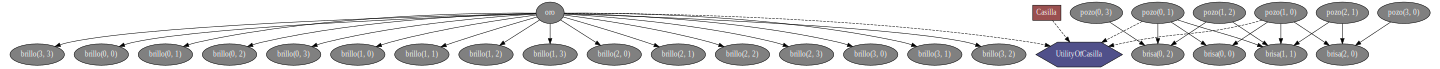

In [27]:
model = crear_red_decision((0,0))
gnb.showInfluenceDiagram(model,size="20")

Supongamos que no hay brillo ni brisa en la casilla $(0,0)$. La inferencia nos dice que las dos casillas adyacentes tienen la misma utilidad:

In [28]:
evidencia = {'brillo(0, 0)':0, 'brisa(0, 0)':0}
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

(pyAgrum.Potential<double>@0000013238F5C818) 
  Casilla          |
(1, 0)   |(0, 1)   |
---------|---------|
 0.0667  | 0.0667  |

Podemos crear la red con la inferencia anterior y visualizarla:

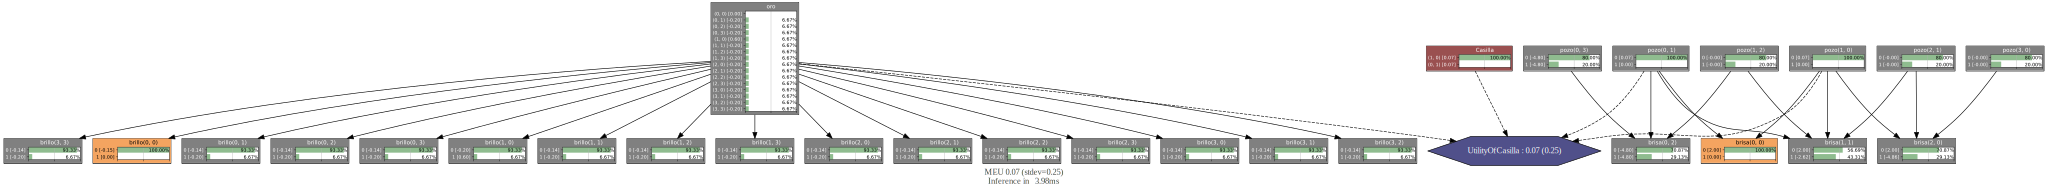

In [29]:
gnb.showInference(model,
                  evs={'brillo(0, 0)':0, 'brisa(0, 0)':0},
                  targets={},
                  size="30"
                 )

**Ejercicio 5:**

Suponga que el juego inicia y el agente no percibe nada en la casilla de salida. Luego avanza dos casillas hacia la derecha sin percibir nada. Al avanzar una casilla arriba se encuentra con una brisa. Cree una red de decisión para encontrar la acción que maximiza la utilidad esperada de este escenario. ¿Es esta acción intuitivamente aceptable?

La respuesta debe ser la siguiente:

<img src="./imagenes/respuesta-ok.png" width="150">

In [30]:
model = crear_red_decision((2,1))

evidencia = {'brillo(0, 0)': 0, 'pozo(0, 0)': 0, 
            'brillo(1, 0)': 0, 'brisa(1, 0)': 0,
            'brillo(2, 0)': 0, 'pozo(2, 0)': 0, 
            'brisa(2, 1)': 1, 'brillo(2, 1)': 0, 
            }
ie = gum.InfluenceDiagramInference(model)
ie.setEvidence(evidencia)
ie.makeInference()
ie.posteriorUtility("Casilla")

(pyAgrum.Potential<double>@000001323983BAB8) 
  Casilla                              |
(1, 1)   |(3, 1)   |(2, 0)   |(2, 2)   |
---------|---------|---------|---------|
 0.0833  | -0.5185 | 0.0000  | -0.5185 |

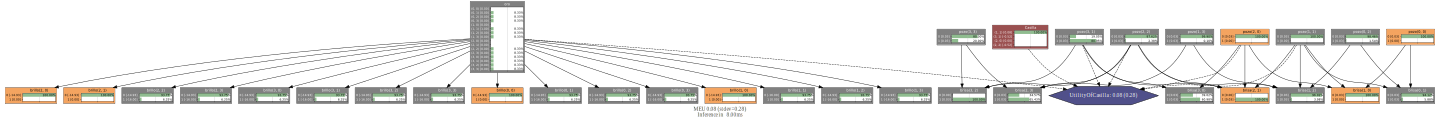

In [31]:
gnb.showInference(model,evs=evidencia,size="20")

---

# Agente basado en utilidad  <a class="anchor" id="utility-based">

([Volver al inicio](#inicio))

Ya tenemos todas las herramientas para crear un programa de agente basado en utilidad. Solo necesitamos dos cosas: una función auxiliar que empaquete la toma de decisiones y, luego, adaptar el programa de agente que ya teníamos para incluir esta nueva forma de crear planes de acciones.
    
Comenzamos con la función auxiliar de toma de decisiones:

In [32]:
def tomar_decision(casilla, evs, tabla=False, imagen=False):
    # Creamos la red de decision para la casilla dada
    model = crear_red_decision(casilla)
    # Guardamos solo la evidencia que cae en las variables de la red de decisión
    evid = {v:evs[v] for v in evs.keys() if v in model.names()}
    # Hacemos la inferencia
    ie = gum.InfluenceDiagramInference(model)
    ie.setEvidence(evid)
    ie.makeInference()
    casillas = [c for c in adyacentes(casilla)]
    valores = ie.posteriorUtility("Casilla")
    if tabla:
        print(valores)
    # Escogemos la acción con mayor utilidad esperada
    decision = maximo_aleatorio(valores.tolist())
    if tabla:
        print('Decisión ->', casillas[decision])
    if imagen:
        gnb.showInference(model,evs=evid,targets={},size="30")
    return casillas[decision]


Comprobamos su funcionamiento con una decisión sencilla:

In [33]:
evidencia = {'pozo(0, 0)':0, 'brisa(1, 0)':1, 'brillo(0, 0)':0}
tomar_decision((1,0), evidencia, tabla=True, imagen=False)


  Casilla                    |
(0, 0)   |(2, 0)   |(1, 1)   |
---------|---------|---------|
 0.0000  | -0.5259 | -0.5259 |

Decisión -> (0, 0)


(0, 0)

Ahora adaptamos el programa de agente que teníamos para que la toma de decisiones se haga maximizando la utilidad esperada. Este programa considera las siguientes reglas:

* Si ve el oro, lo toma y traza una ruta hasta la salida.
* Si está en la salida y ya tiene el oro, sale.
* En otro caso, escoge la acción que maximiza la utilidad esperada dada una lista de evidencias.

In [34]:
def programa_utility_based(self, DEB=False):
       
    # Encuentra la casilla actual
    casilla_actual = self.loc
#    print('agente en:', casilla_actual, self.oro)
    direccion = self.direccion
    percepcion = self.perceptos
    casillas_seguras = self.seguras
    evidencia = self.evidencia
    oro = self.oro
    
    # Si tiene el oro y está en la casilla de salida, salir
    if oro and (casilla_actual == (0,0)):
        self.acciones = ['salir']
    # Si ve el oro, lo toma y planea un camino hasta la salida
    if 'brillo' in percepcion:
#        print("¡Veo el oro!")
        self.oro = True
        self.acciones = ['agarrar']
        R = Rejilla(casilla_actual, (0,0), casillas_seguras)
        camino = best_first_search(R)
        camino = [casilla_actual] + solucion(camino)
        acs = acciones_camino(camino, direccion)
        if DEB:
            print(f'desde {casilla_actual} hasta {casilla_ir}')
            print(f'sigue el camino {acs}')
        self.acciones += acs
    else:
        # Escoje la casilla de mayor utilidad
        casilla_ir = tomar_decision(casilla_actual, evidencia, tabla=DEB)
        camino = [casilla_actual, casilla_ir]
        acs = acciones_camino(camino, direccion)
        if DEB:
            print(f'desde {casilla_actual} hasta {casilla_ir}')
            print(f'sigue el camino {acs}')
        self.acciones += acs

setattr(Agente, "programa", programa_utility_based)

Observe que como argumento de este programa estamos usando un diccionario de evidencia y una lista de casillas seguras. Esta información se va guardando en cada iteración del agente. Veámos un ejemplo de cómo funciona este programa en un caso concreto:

Juego terminado!
 Puntaje: 951


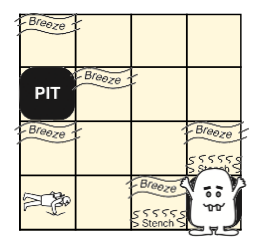

In [35]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(3,0), oro=(2,3), pozos=[(3,0), (0,2)])
agente = Agente()
evidencia = {'pozo(0, 0)':0}
casillas_seguras = []
setattr(Agente, "evidencia", evidencia)
setattr(Agente, "seguras", casillas_seguras)
formulas = agente.fluentes_mapa_mental()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
max_turnos = 50
W.pintar_todo()
plt.show()

for t in range(max_turnos):
#    vis(agente)
    casilla_actual = agente.loc
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(agente.loc)
    agente.perceptos = W.para_sentidos()
    if 'brillo' not in agente.perceptos:
        agente.evidencia['brillo'+str(casilla_actual)] = 0
    if 'brisa' in agente.perceptos:
        agente.evidencia['brisa'+str(casilla_actual)] = 1
    else:
        agente.evidencia['brisa'+str(casilla_actual)] = 0        
#    print(agente.evidencia)
    a = agente.reaccionar(DEB=False)
#    print(a)
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    agente.estimar_estado(W)
    print("pintar todo")
    W.pintar_todo()
    plt.show()
    sleep(.5) 

Al héroe le va bastante bien buscando el oro en este escenario y, una vez encontrado, saliendo de la caverna de manera segura.

Ahora corra el siguiente escenario:

¡Juego terminado!
El héroe ha sido devorado por el Wumpus
Puntaje: -1007


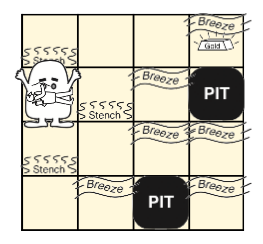

In [36]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(0,2), oro=(3,3), pozos=[(2,0), (3,2)])
agente = Agente()
evidencia = {'pozo(0, 0)':0}
casillas_seguras = []
setattr(Agente, "evidencia", evidencia)
setattr(Agente, "seguras", casillas_seguras)
formulas = agente.fluentes_mapa_mental()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
max_turnos = 50
W.pintar_todo()
plt.show()

for t in range(max_turnos):
#    vis(agente)
    casilla_actual = agente.loc
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(agente.loc)
    agente.perceptos = W.para_sentidos()
    if 'brillo' not in agente.perceptos:
        agente.evidencia['brillo'+str(casilla_actual)] = 0
    if 'brisa' in agente.perceptos:
        agente.evidencia['brisa'+str(casilla_actual)] = 1
    else:
        agente.evidencia['brisa'+str(casilla_actual)] = 0        
#    print(agente.evidencia)
    a = agente.reaccionar(DEB=False)
#    print(a)
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    agente.estimar_estado(W)
    W.pintar_todo()
    plt.show()
    sleep(.25) 

**Ejercicio 6:**

Modifique la función `crear_red_decision` para incluir las variables de hedor y Wumpus, para que el héroe sea capaz de superar el escenario anterior.

In [71]:
W = Wumpus()
def adyacentes(c):
    return W.adyacentes(c)

def crear_red_decision(cas):   
    
    model = gum.InfluenceDiagram()
    
    todas_casillas = [(x,y) for x in range(4) for y in range(4)]
    total_casillas = len(todas_casillas)
    casillas = adyacentes(cas)
    num_casillas = len(casillas)
    aux = [adyacentes(c) for c in casillas]
    aux = [item for sublist in aux for item in sublist]
    casillas_adyacentes2 = list(set(aux))
    aux = [adyacentes(c) for c in casillas_adyacentes2]
    aux = [item for sublist in aux for item in sublist]
    casillas_adyacentes3 = list(set(aux))

    # Creando variables del oro y brillo
    oro = gum.LabelizedVariable('oro','oro',total_casillas)
    for i, c in enumerate(todas_casillas):
        oro.changeLabel(i,str(c))
        brillo_i = gum.LabelizedVariable('brillo'+str(c),'brillo'+str(c),2)
        model.addChanceNode(brillo_i)
    model.addChanceNode(oro)

    # Creando variables de pozo
    for c in casillas_adyacentes3:
        pozo_i = gum.LabelizedVariable('pozo'+str(c),'pozo'+str(c),2)
        model.addChanceNode(pozo_i)

    # Creando variables de brisa
    for c1 in casillas_adyacentes2:
        brisa_i = gum.LabelizedVariable('brisa'+str(c1),'brisa'+str(c1),2)
        model.addChanceNode(brisa_i)

    # Creando variables de wumpus
    for c in casillas_adyacentes3:
        wumpus_i = gum.LabelizedVariable('wumpus'+str(c),'wumpus'+str(c),2)
        model.addChanceNode(wumpus_i)

    # Creando variables de hedor
    for c1 in casillas_adyacentes2:
        hedor_i = gum.LabelizedVariable('hedor'+str(c1),'hedor'+str(c1),2)
        model.addChanceNode(hedor_i)

    # Creando variables de casilla
    casilla = gum.LabelizedVariable('Casilla','Casilla a moverse',num_casillas)
    for i, c in enumerate(casillas):
        casilla.changeLabel(i,str(c))
    model.addDecisionNode(casilla)

    # Creando variable de utilidad
    ut_casilla = gum.LabelizedVariable('UtilityOfCasilla','Valor casilla',1)
    model.addUtilityNode(ut_casilla)

    # Creando aristas del grafo
    for c in todas_casillas:
        model.addArc('oro', 'brillo'+str(c))
    for c in casillas_adyacentes3:
        for c1 in adyacentes(c):
            if c1 in casillas_adyacentes2:
                model.addArc('pozo'+str(c), 'brisa'+str(c1))
    for c in casillas:
        model.addArc('pozo'+str(c), 'UtilityOfCasilla')
    
    for c in casillas_adyacentes3:
        for c1 in adyacentes(c):
            if c1 in casillas_adyacentes2:
                model.addArc('wumpus'+str(c), 'hedor'+str(c1))
    for c in casillas:
        model.addArc('wumpus'+str(c), 'UtilityOfCasilla')

    model.addArc('oro', 'UtilityOfCasilla')
    model.addArc('Casilla', 'UtilityOfCasilla')
    
    # Creando tablas de probabilidad
    model.cpt('oro').fillWith([1/total_casillas]*total_casillas)
    for c in todas_casillas:
        brillo = 'brillo' + str(c)
        for c1 in todas_casillas:
            model.cpt(brillo)[{'oro': str(c1)}] = oro_a_brillo(c,c1)
    
    pozos = ['pozo'+str(c) for c in casillas_adyacentes3]
    for pozo in pozos:
        model.cpt(pozo)[:]=[0.8,0.2]

    for c in casillas_adyacentes2:
        brisa = 'brisa' + str(c)
        pozos_brisa = ['pozo'+str(c1) for c1 in adyacentes(c)]
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)

    wumpuss = ['wumpus'+str(c) for c in casillas_adyacentes3]
    for wumpus in wumpuss:
        model.cpt(wumpus)[:]=[0.66,0.33]

    for c in casillas_adyacentes2:
        hedor = 'hedor' + str(c)
        wumpus_hedor = ['wumpus'+str(c1) for c1 in adyacentes(c)]
        opciones = list(product(*[[0,1] for p in wumpus_hedor]))
        dicts_variables = [{wumpus_hedor[i]:op[i] for i in range(len(wumpus_hedor))} for op in opciones]
        for d in dicts_variables:
            model.cpt(hedor)[d] = wumpus_a_hedor(d)

    for c in casillas_adyacentes2:
        brisa = 'brisa' + str(c)
        pozos_brisa = ['pozo'+str(c1) for c1 in adyacentes(c)]
        opciones = list(product(*[[0,1] for p in pozos_brisa]))
        dicts_variables = [{pozos_brisa[i]:op[i] for i in range(len(pozos_brisa))} for op in opciones]
        for d in dicts_variables:
            model.cpt(brisa)[d] = pozos_a_brisa(d)
        
    # Creando la utilidad
    wumpuss = ['wumpus'+str(c) for c in casillas]
    pozos = ['pozo'+str(c) for c in casillas]
    casillas = [str(c) for c in adyacentes(cas)]
    todas_casillas = [str(c) for c in todas_casillas]
    variables = ['Casilla','oro'] + pozos + wumpuss
    #print("variables: ", variables)
    opciones = list(product(casillas, todas_casillas, *[[0,1] for i in pozos], *[[0,1] for i in wumpuss]))
    #print("opciones 1: ", opciones)
    dicts_variables = [{variables[i]:op[i] for i in range(len(variables))} for op in opciones]
    #print("dicts_variables: ", dicts_variables)
    for d in dicts_variables:
        model.utility('UtilityOfCasilla')[d]=utilidad(d)

    return model

def pozos_a_brisa(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

def wumpus_a_hedor(d):
    if 1 not in d.values():
        return [1,0]
    else:
        return [0,1]

def oro_a_brillo(c1,c2):
    if c1 == c2:
        return [0,1]
    else:
        return [1,0]
    
def utilidad(d):
    C = d['Casilla']
    if (d['wumpus'+str(C)] == 0) and (d['oro'] == C ) and (d['pozo'+str(C)] == 0):
        return 1
    elif (d['pozo'+str(C)] == 0) and (d['wumpus'+str(C)] == 0) :
        return 0
    else:
        return -1

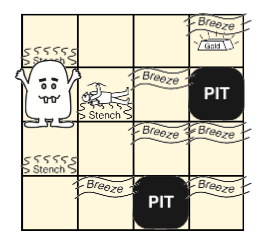

In [78]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(0,2), oro=(3,3), pozos=[(2,0), (3,2)])
agente = Agente()
evidencia = {'pozo(0, 0)':0, 'wumpus(0, 0)':0}
casillas_seguras = []
setattr(Agente, "evidencia", evidencia)
setattr(Agente, "seguras", casillas_seguras)
formulas = agente.fluentes_mapa_mental()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
max_turnos = 20
W.pintar_todo()
plt.show()

for t in range(max_turnos):
    turnos_disp = max_turnos - t
    print("turnos disponibles", turnos_disp)
#    vis(agente)
    casilla_actual = agente.loc
    if casilla_actual not in casillas_seguras:
        casillas_seguras.append(agente.loc)
    agente.perceptos = W.para_sentidos()
    if 'brillo' not in agente.perceptos:
        agente.evidencia['brillo'+str(casilla_actual)] = 0
    if 'brisa' in agente.perceptos:
        agente.evidencia['brisa'+str(casilla_actual)] = 1
    else:
        agente.evidencia['brisa'+str(casilla_actual)] = 0     
    if 'hedor' in agente.perceptos:                         # new
        agente.evidencia['hedor'+str(casilla_actual)] = 1   # new
    else:                                                   # new
        agente.evidencia['hedor'+str(casilla_actual)] = 0   # new
    print("Evidencia: ", agente.evidencia)
    a = agente.reaccionar(DEB=False)
    print("Accion: ", a)
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    agente.estimar_estado(W)
    W.pintar_todo()
    plt.show()
    sleep(.25) 

En este notebook usted aprendió:

* Asociar las acciones racionales con la maximización de la utilidad esperada.
* Implementar redes de decisión mediante el paquete `pyAgrum`.
* Implementar un programa de agente basado en la utilidad.